<a href="https://colab.research.google.com/github/LucasFaleirosMoreira/tratamento_dados/blob/main/AtividadeTratamentoDados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as srn
import statistics as sts

In [ ]:
#primeiro passo: importar os dados

#importamos o arquivo com os dados
climData = pd.read_csv("/tempo.csv", sep = ";")


#pegando uma "amostra" de como os dados estão
climData.head(5)

#Com a amostra dos dados vemos que o nome das colunas estão de acordo, logo, não precisarão ser alterados

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


In [ ]:
#vendo as dimensões do dataframe
climData.shape

(14, 5)

In [ ]:
#Exploração dos dados categóricos 1


#então vamos explorar todos os dados categóricos agrupando eles e vendo todas suas vertentes

agrupado = climData.groupby(['Aparencia']).size()
agrupado

#!!!!!!!!percebemos que tem um erro pois não deveria existir uma aparencia chamada "menos"!!!!!!!!!!

,0
Aparencia,
chuva,5
menos,1
nublado,3
sol,5


In [ ]:
#Exploração dos dados categóricos 2

agrupado = climData.groupby(['Vento']).size()
agrupado

#não temos nenhum erro

,0
Vento,
FALSO,7
VERDADEIRO,6


In [ ]:
#Exploração dos dados categóricos 3

agrupado = climData.groupby(['Jogar']).size()
agrupado

#não temos nenhum erro

,0
Jogar,
nao,5
sim,9


In [ ]:
#Exploração dos dados numéricos 1

#para dados numéricos primeiro fazemos um resumo estatistico da coluna

climData['Temperatura'].describe()

#!!!!!!!!!percebemos uma anomalia no valor maximo, chegando até 1220°F!!!!!!!!!!

,Temperatura
count,14.000000
mean,155.571429
std,306.433759
min,64.000000
25%,69.250000
50%,73.500000
75%,80.750000
max,1220.000000


Text(0.5, 1.0, 'Temperatura')

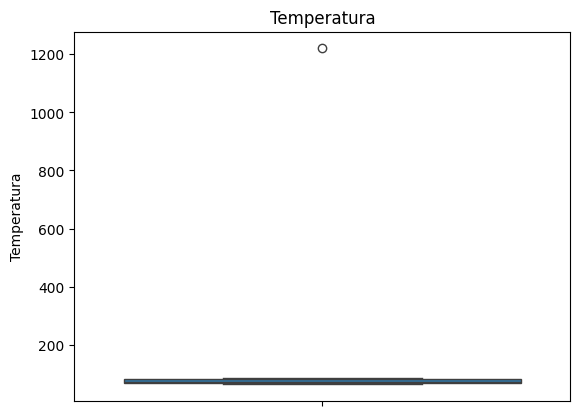

In [ ]:
#vamos visualizar também através de um boxplot para melhor compreensão

srn.boxplot(climData['Temperatura']).set_title("Temperatura")


#agora conseguimos ver com clareza um outlier (valor "distante" dos demais valores)

Text(0.5, 1.0, 'Temperatura')

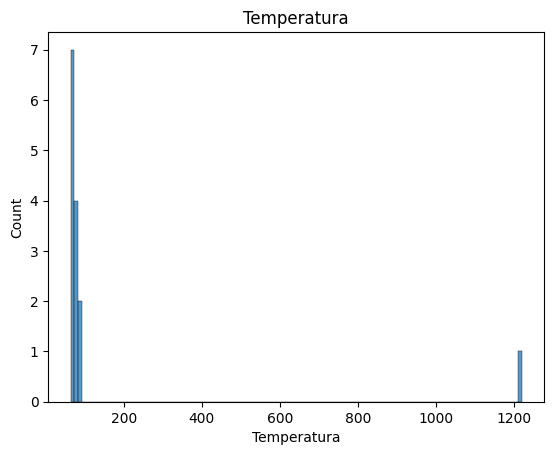

In [ ]:
#visualização em um histograma

srn.histplot(climData['Temperatura']).set_title("Temperatura")

In [ ]:
#Exploração dos dados numéricos 2

climData['Umidade'].describe()

#percebemos 2 erros: temos apenas 13 dados de umidade, sendo que temos 14 linhas. E a máxima está muito alta, deve ser investigada

,Umidade
count,13.000000
mean,89.769231
std,34.540203
min,65.000000
25%,70.000000
50%,85.000000
75%,90.000000
max,200.000000


Text(0.5, 1.0, 'Umidade')

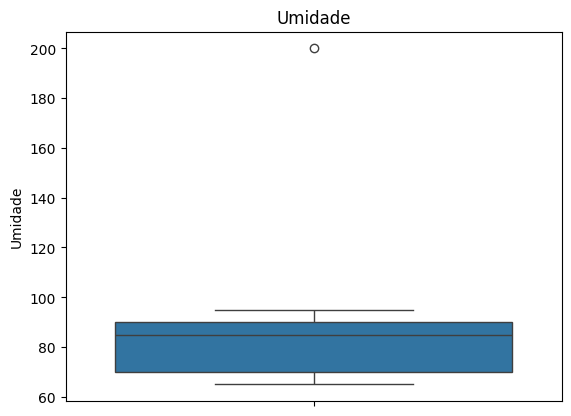

In [ ]:
#Analisando com boxplot

srn.boxplot(climData['Umidade']).set_title('Umidade')

#percebemos mais uma vez um outlier

Text(0.5, 1.0, 'Umidade')

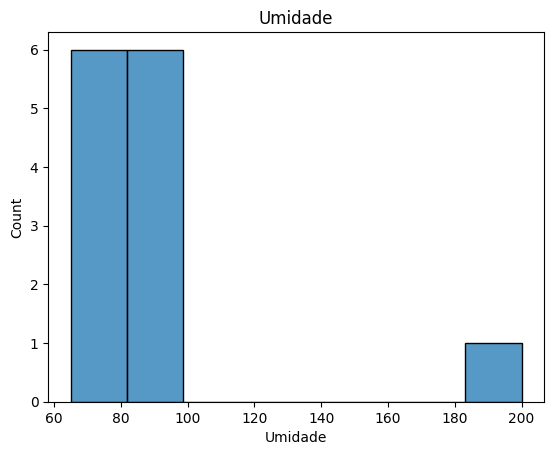

In [ ]:
#Analisando com histograma

srn.histplot(climData['Umidade']).set_title('Umidade')

#percebemos a falta de um dado de umidade

In [ ]:
#Tratamento dos dados

#1- Verificar se há NaN

climData.isnull().sum()


#percebemos que na coluna "Vento" e "Umidade" temos um valor NaN

,0
Aparencia,0
Temperatura,0
Umidade,1
Vento,1
Jogar,0


In [ ]:
#2- Substituição do(s) valor(es) NaN

#Coluna "Vento"
#por ser um dado categórico pegamos a moda e então substituimos o valor NaN pela moda (caso fosse um dado numérico deveriamos utilizar mediana)
moda = sts.mode(climData['Vento'])

#substituição (utilizando novo formato para utilizar o metodo "fillna", atualizado na versão 3.0 do pandas)
climData.fillna({'Vento': moda}, inplace=True)

In [ ]:
#verificando se os valores NaN na coluna "Vento" ainda existem
climData['Vento'].isnull().sum()

np.int64(0)

In [ ]:
#Coluna "Umidade"

#por ser um dado numérico pegamos a mediana e substituimos o valor NaN pela mediana
mediana = sts.median(climData['Umidade'])

#substituição dos valores NaN
climData.fillna({'Umidade': mediana}, inplace=True)

In [ ]:
#verificando se os valores NaN na coluna "Umidade" ainda existem
climData['Umidade'].isnull().sum()

np.int64(0)

In [ ]:
#3- Substituir os dados numéricos atipicos com base no desvio padrão

#como podemos ver nos gráficos e nas visualizações dos dados numericos ainda existe um outlier na coluna "Temperatura" e outro na coluna "Umidade"

#Uma boa prática para tratar outliers é utilizar o desvio padrão. Vamos considerar que 2 desvio padrão seja um valor atipico.
desv = sts.stdev(climData['Temperatura'])
desv


306.433758505241

In [ ]:
#Agora checamos temperaturas que estão acima de 2 desvio padrão

climData.loc[(climData['Temperatura']) > 2 * desv]

,Aparencia,Temperatura,Umidade,Vento,Jogar
7,sol,1220,95.0,FALSO,nao


In [ ]:
#Substituimos o(s) valor(es) acima de 2 desvio padrão pela mediana da coluna

#Coluna "Temperatura"

#pegamos a mediana da coluna "Temperatura"
mediana = sts.median(climData['Temperatura'])

#localizamos e substituimos os valores que são maiores que 2 desvio padrão
climData.loc[(climData['Temperatura']) >= 2 * desv, "Temperatura"] = int(mediana)

In [ ]:
#Verificamos novamente se ainda há outliers na coluna "Temperatura"
climData.loc[(climData['Temperatura']) > 2 * desv]

,Aparencia,Temperatura,Umidade,Vento,Jogar


In [ ]:
#Coluna "Umidade"

#pegamos o desvio padrão da coluna "Umidade"
desv = sts.stdev(climData['Umidade'])
desv

33.204763493832004

In [ ]:
#nesse caso vamos utilizar como base valores maiores que 3 desvio padrao
climData.loc[(climData['Umidade']) >= 3 * desv]

,Aparencia,Temperatura,Umidade,Vento,Jogar
9,chuva,75.0,200.0,FALSO,sim


In [ ]:
#substituimos os valores acima de 3 desvio padrao pela mediana da coluna

#pegamos a mediana da coluna "Umidade"
mediana = sts.median(climData['Umidade'])

#localizamos e substituimos os valores que são maiores que 3 desvio padrão
climData.loc[(climData['Umidade']) >= 3 * desv, 'Umidade'] = mediana

In [ ]:
#verificamos se ainda há outliers na coluna "Umidade"

climData.loc[(climData['Umidade']) >= 3 * desv]

,Aparencia,Temperatura,Umidade,Vento,Jogar


In [ ]:
#Substituir valor fora do padrão da coluna "Aparencia" pela moda
moda = sts.mode(climData['Aparencia'])

climData.loc[climData['Aparencia'] ==  'menos', 'Aparencia'] = moda

In [ ]:
#Agora para finalizar verificamos novamente uma amostra do dataframe

climData.head(14) #(coloquei 14 pq queria ver se todas colunas foram tratadas corretamente)

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85.0,85.00,FALSO,nao
1,sol,80.0,90.00,VERDADEIRO,nao
2,nublado,83.0,86.00,FALSO,sim
3,chuva,70.0,85.50,FALSO,sim
4,chuva,68.0,80.00,FALSO,sim
5,chuva,65.0,70.00,VERDADEIRO,nao
6,sol,64.0,65.00,VERDADEIRO,sim
7,sol,73.5,95.00,FALSO,nao
8,sol,69.0,70.00,FALSO,sim
9,chuva,75.0,85.25,FALSO,sim


In [ ]:
#Verificando se as dimensões do dataframe mudaram
climData.shape

(14, 5)